In [1]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\giova\AppData\Local\Tesseract-OCR\tesseract.exe'

In [2]:
# Passos:
    # 1. Carregar imagem
    # 2. Aplicar binarização
    # 3. Remover ruído
    # 4. Remover bordas
    # 7. Afinar fonte

#### definindo funções

In [17]:
# Carregar imagem
def load_image(image_file):
    img = cv.imread(image_file)
    return img

In [18]:
# Binarização da imagem
def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def binarization(img):
    gray_image = grayscale(img)
    thresh, im_bw = cv.threshold(gray_image, 100, 255, cv.THRESH_BINARY)
    return im_bw

In [19]:
# Remover ruído adicionando blur
def remove_noise(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)

In [20]:
# Remover bordar selecionando apenas o que está dentro da maior borda
def remove_borders(image):
    contours, hierarchy = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cntSorted = sorted(contours, key=lambda x:cv.contourArea(x))
    cnt = cntSorted[-1] # Seleciona o maior contorno
    x, y, w, h = cv.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [21]:
# Afinar a fonte da imagem
def thin_font(image):
    kernel = np.ones((2,2), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    return (image)

In [22]:
# Mostrar o resultado da conta
def show_result(img):
    myconfig = r"--psm 9 --oem 3"
    data = pytesseract.image_to_string(img, lang='eng+equ', config=myconfig)
    result = eval(data)
    print('O resultado da expressão é:', result)

#### chamando funções

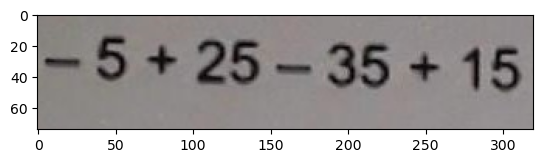

In [64]:
img = load_image('livro2.jpg')
plt.imshow(img, 'gray', vmin=0, vmax=255)

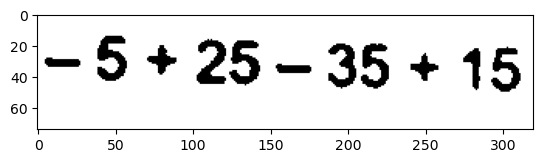

In [65]:
img = binarization(img)
plt.imshow(img, 'gray', vmin=0, vmax=255)

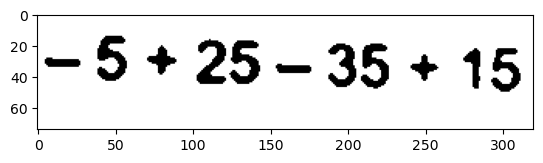

In [66]:
img = remove_noise(img)
plt.imshow(img, 'gray', vmin=0, vmax=255)

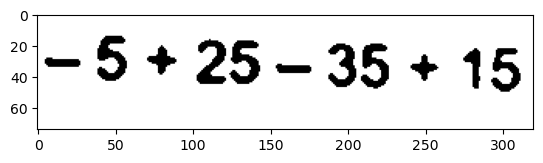

In [67]:
img = remove_borders(img)
plt.imshow(img, 'gray', vmin=0, vmax=255)

In [68]:
show_result(img)

O resultado da expressão é: 0


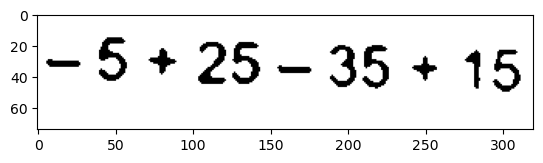

In [69]:
eroded_image = thin_font(img)
plt.imshow(eroded_image, 'gray', vmin=0, vmax=255)

In [70]:
show_result(eroded_image)

O resultado da expressão é: 0
